In [1]:
# install tensorflow 
import tensorflow as tf

# notebook to use an RNN for image classification on the MNIST dataset

this is somewhat counterintuitive, as the other examples for RNNs were on time series data

but, a multi-dimensional time series is a 2D (T x D) matrix, where each column is a time series

similarly, a grayscale image is also a 2D (H x W) matrix, so we should be able to use the same architecture

In [2]:
# other imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [3]:
# load in the data
mnist = tf.keras.datasets.mnist

# split into test and training sets, and scale 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255., x_test/255.
print('x_train.shape:', x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
# build the model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [5]:
# compile & train the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 5ms/step - loss: 0.3395 - accuracy: 0.8910 - val_loss: 0.1509 - val_accuracy: 0.9524
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1055 - accuracy: 0.9682 - val_loss: 0.0742 - val_accuracy: 0.9775
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0724 - accuracy: 0.9784 - val_loss: 0.0713 - val_accuracy: 0.9786
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0576 - accuracy: 0.9828 - val_loss: 0.0510 - val_accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0457 - accuracy: 0.9861 - val_loss: 0.0534 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0399 - accuracy: 0.9877 - val_loss: 0.0592 - val_accuracy: 0.9825
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0319 - accuracy: 0.9905 - val_loss: 0.0412 - val_accurac

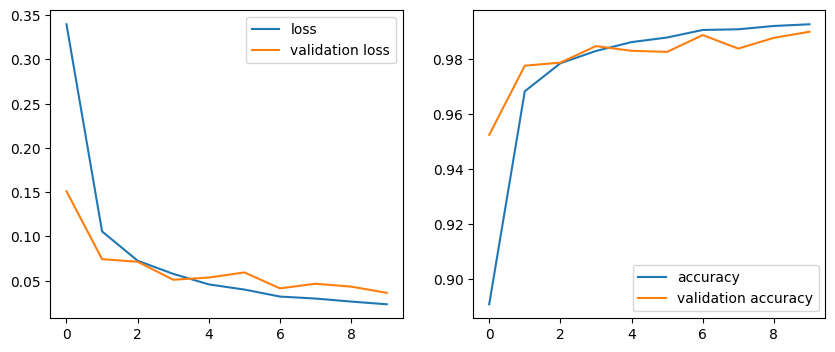

In [11]:
# plot loss & accuracy
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(r.history['loss'], label='loss')
ax[0].plot(r.history['val_loss'], label='validation loss')
ax[0].legend()
ax[1].plot(r.history['accuracy'], label='accuracy')
ax[1].plot(r.history['val_accuracy'], label='validation accuracy')
ax[1].legend()
plt.show()

313/313 [==============================] - 2s 3ms/step
confusion matrix without normalization
[[ 972    0    1    0    0    1    5    1    0    0]
 [   0 1131    1    0    0    1    1    1    0    0]
 [   1    2 1021    1    0    0    0    3    4    0]
 [   0    0    4  997    0    3    0    3    2    1]
 [   0    0    1    0  970    0    5    3    1    2]
 [   1    0    0    2    0  885    1    1    2    0]
 [   1    2    0    0    0    3  948    0    4    0]
 [   0    6    4    3    1    0    0 1012    0    2]
 [   1    0    1    0    0    3    0    3  965    1]
 [   1    0    0    0    4    2    0    4    1  997]]


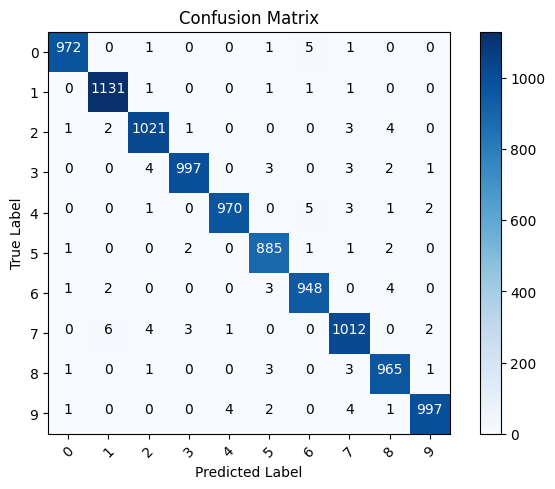

In [12]:
# plot the confusion matrix 
# this tells us: for each label, how many predictions corresponded to that label
# we want most of the entries to be on the diagonal (i.e. entries = prediction)

# the following function requires sklearn and itertools
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, 
                          normalize=False,
                          title='Confusion Matrix', 
                          cmap=plt.cm.Blues): 
  """
  This function prints and plots the confusion matrix, 
  normalization can be applied by setting normalize=True.
  """
  if normalize: 
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("normalized confusion matrix")
  else: 
    print("confusion matrix without normalization")

  print(cm)
    
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
    plt.text(j, i, format(cm[i,j], fmt), 
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black') 

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))    

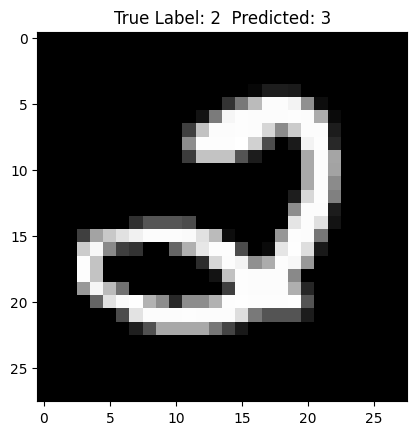

In [15]:
# plot misclassified examples
# index of misclassified predictions using np.where
# np.where returns two values, but index is first (hence [0])
misclassified_idx = np.where(p_test != y_test)[0]

# select a random index and plot - need to reshape as image was flattened
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title('True Label: %s  Predicted: %s' % (y_test[i], p_test[i]))
plt.show()